Exercise 7.4

In [57]:
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [84]:
#Constructing the block diagonal matrix A
p = .7
q = .3
r = 3
a = np.tile(p, (50, 50))
A = np.kron(np.eye(r,dtype=int),a)
A[A==0] = q

#Constructing the 150x150 matrix B
B = np.random.rand(150,150)
# print(A,B)

In [85]:
#Restructuring the A matrix
A[B>=A] = 1
A[A!=1] = 0
# print(A)

In [86]:
#Permuting the rows and columns of A
random.shuffle(A)
# print(A)

[[0. 1. 0. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 1. 1.]]


Part 1 - Applying Lloyd's algorithm with random initialization with k = 3

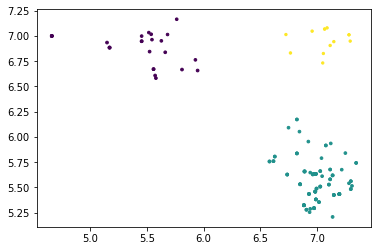

In [104]:
kmeans = KMeans(n_clusters=3,init="random",algorithm="full")
x = kmeans.fit_transform(A)
plt.scatter(*x.T,c=kmeans.labels_)

Notice that there is no intermixing of the colors. As such, we may conclude that we find the correct clusters for k = 3, though we do not conclude yet that this was the correct value for k.

Part 2 - Applying Lloyd's algorithm to A for 1≤k≤10

In [93]:
k_vals = list(range(1,11))
inerts = []
for i in k_vals:
    kmeans_i = KMeans(n_clusters=i,init="random",algorithm="full")
    x_i = kmeans_i.fit(A)
    inerts.append(kmeans_i.inertia_)
# print(inerts)

Text(0.5, 1.0, 'Sum of Squared Distances Vs. k')

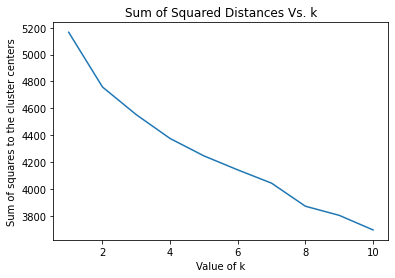

In [94]:
plt.plot(k_vals, inerts)
plt.xlabel("Value of k")
plt.ylabel("Sum of squares to the cluster centers")
plt.title("Sum of Squared Distances Vs. k")

Here, we notice that 3 must not have been the correct value for k. We make this deduction since the sum of squares to the cluster centers seems to be decreasing (albeit the slope is also decreasing) as the value of k increases. Thus, the most correct value of k according to this plot seems to be k = 10.